# Problema 9.3
Considere el siguiente modelo simple de un capacitor electronico, consiste en dos placas metalicas planas encerradas en una caja de metal cuadrada:

Por simplicidad vamos a modelar el sistema en dos dimensiones. Usando cualquiera de los metodos estudiados, excriba un programa para calcular el potencial electrostatico en la caja en una malla de 100 x 100 puntos, donde los muros de la caja tienen voltaje cero y las dos placas (las cuales tienen gorosor despreciable) tiene voltaje +V o -V como se muestra. El programa debe calcular el valor del potencial en cada punto de la malla con una precision de $10^{-6}$ voltios y haga una grafica de la densidad.

## Solucionando para el metodo de relajacion normal

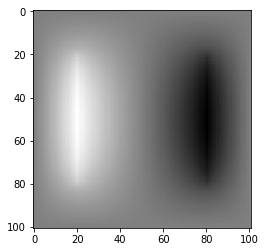

In [5]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

#Constantes
M = 100        #Cuadrados de rejilla en un lado
V = 1.0        #Voltaje en el muro tope 
target = 1e-6  #Precisión 
#e_o=8.6841878176e-12 #Permitividad electrica del vacio


#Creando arrays para guardar los valores de potencial
phi = zeros([M+1,M+1],float)
phi[0,:] = 0
ro = zeros([M+1,M+1],float)
ro[20:81,20]=1.0
ro[20:81,80]=-1.0
phiprime = empty([M+1,M+1],float)

#Main loop
delta = 1.0
while delta>target:
    
    #Calcular los nuevos valores de potencial
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4+(ro[i,j])/4
                
    #Calculando la diferencia maxima de los valores viejos
    delta = max(abs(phi-phiprime))
                
    #Cambiando los dos arrays
    phi,phiprime = phiprime,phi
                
#Hacer grafico
imshow(phi)
gray()
show()


Metodo poco eficaz computacionalmente

## Solucionando para el metodo de Gauss-Sediel

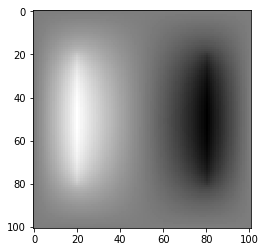

In [4]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

#Constantes
M= 100
V= 1.0
target = 1e-6
#Creando arrays para guardar los valores de potencial
phi = zeros([M+1,M+1],float)
phi[0,:]= 0
ro = zeros([M+1,M+1],float)
ro[20:81,20] = 1.0
ro[20:81,80] = -1.0

#Main loop
delta = 1.0
omega = 0.9
while delta>target:
    delta = 0
    #Calcular los nuevos valores de potencial
    for i in range(1,M):
        for j in range(1,M):
            difference=((phi[i+1,j] + phi[i-1,j]\
                       + phi[i,j+1] + phi[i,j-1])/4 +(ro[i,j])/4) - phi[i,j]
            phi[i,j]=phi[i,j]+(1+omega)*difference
           
            if difference>delta: delta=difference
            
            
imshow(phi)            
gray()
show()